# Bibliotecas

In [1]:
from montaDataset import pegaData
from imagem import Imagem
from otsu_niblack import otsu, niblack
from matplotlib import pyplot as plt #para plotar os gráficos
from aplicaKM import aplicaKM
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans, AffinityPropagation, MeanShift, estimate_bandwidth #para usar o KMeans
import numpy as np
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans
from skimage.filters.rank import mean
from skimage.filters.thresholding import threshold_otsu
from glob import glob
from skimage.io import imsave
from otsu_niblack import otsu, niblack
from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_auc_score

# Dataset

In [2]:
dataset = pegaData('ultrassound/cropped/')
datasetKMeans = pegaData('results/kmeans/')
datasetOtsu = pegaData('results/otsu/')
datasetNiblack = pegaData('results/niblack/')

In [5]:
img = Imagem(dataset[1])
img.ler()

# Questão 01

## K-Means
Criação do dataset com imagens com K-Means aplicados.

In [ ]:
def aplica_kmeans(imagens):
    for i in imagens:
        img = Imagem(i)
        img.ler()
        img_media = mean(img.dimensoes[0], np.ones((10,10)))
        kmeans = KMeans(n_clusters = 2)
        trimg = np.reshape(img_media, (-1,1))
        kmeans.fit(trimg)
        result = (kmeans.labels_.reshape(img_media.shape))
        local = i
        new = './results/kmeans/' + local.replace("./ultrassound/cropped/","")
        imsave(new,result)

In [ ]:
#aplica_kmeans(dataset)

In [23]:
dataset[1] == datasetKMeans[1]

False

## Niblack e Otsu

In [ ]:
def aplica_otsu_niblack(imagens):
    # Função que cria a cópia do dataset com imagens com otsu e niblack aplicados.
    for i in imagens:
        img = Imagem(i)
        img.ler()
        o = otsu(img.dimensoes[0])
        n = niblack(img.dimensoes[0], ws=25, k=0.8)
        local = i
        new1 = './ultrassound/otsu/'
        new2 = './ultrassound/niblack/'
        plt.imsave(new1,o,cmap='gray')
        plt.imsave(new2,n,cmap='gray')


## Outras Funções de Agrupamento

In [5]:
def aglomeracao(imagem):
    ms = AgglomerativeClustering(n_clusters=2)
    f = np.reshape(imagem, (-1,1))
    ms.fit(f)
    resultado = (ms.labels_.reshape(imagem.shape))
    return resultado

In [6]:
def espectral(imagem):
    e = SpectralClustering(n_clusters=2)
    f = np.reshape(imagem, (-1,1))
    e.fit(f)
    resultado = (e.labels_.reshape(imagem.shape))
    return resultado

In [7]:
def aplicarClus(imagem):
    return {
        'aglomeracao': aglomeracao(imagem),
        'espectral': espectral(imagem)
    }
    

In [12]:
img_teste = Imagem(dataset[0])
img_teste.ler()
img_teste.redimensionar(porcentagem=0.3)

In [14]:
r = aplicarClus(img_teste.img_redimensionada)

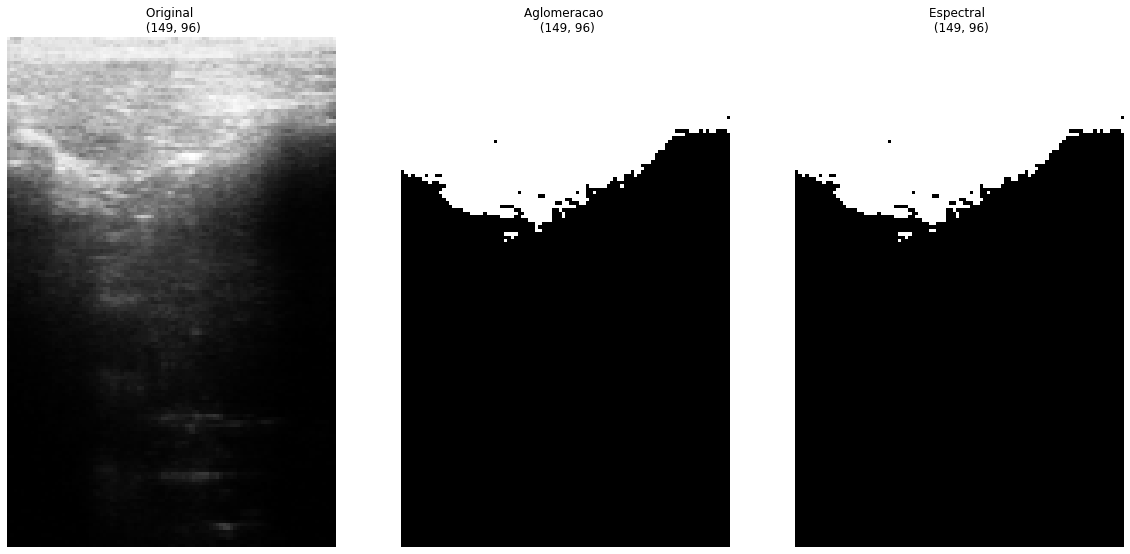

In [18]:
img.manyShowWithTitle(
    {'img': img_teste.img_redimensionada, 'title': 'Original'},
    {'img': r['aglomeracao'], 'title': 'Aglomeracao'},
    {'img': r['espectral'], 'title': 'Espectral'}
)

## Comparação

In [21]:
def comparacao(imagem=img, indice=0):
    imagem.abrirVarios(dataset[indice], datasetKMeans[indice], datasetOtsu[indice], datasetNiblack[indice])
    imagem.mostraIMGS(['Original', 'KMeans', 'Otsu', 'Niblack'])
    imagem.imgs = []

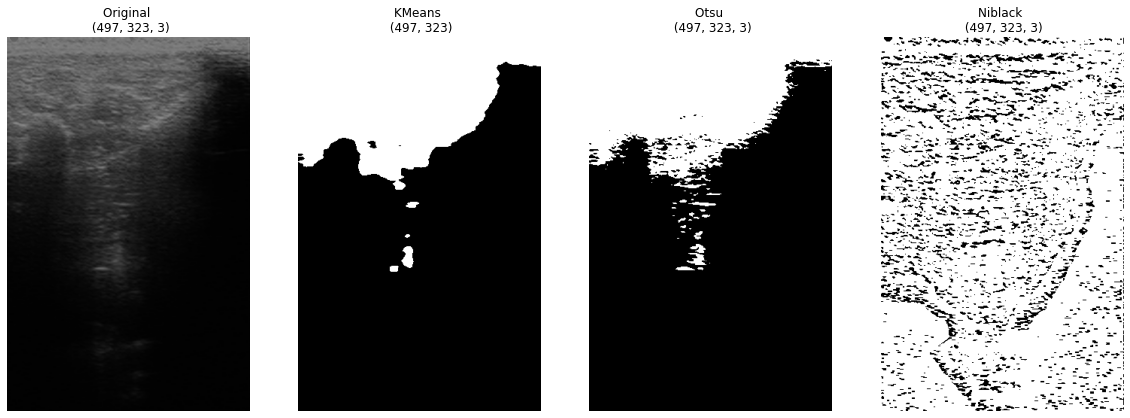

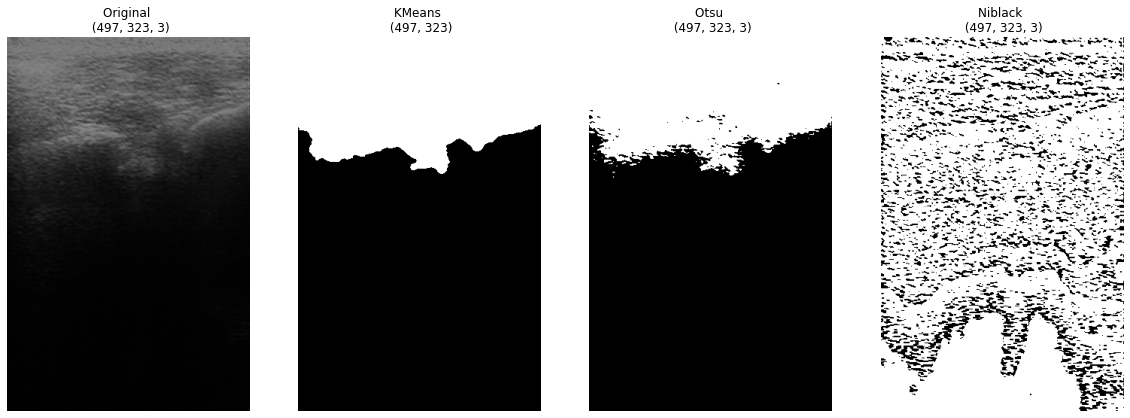

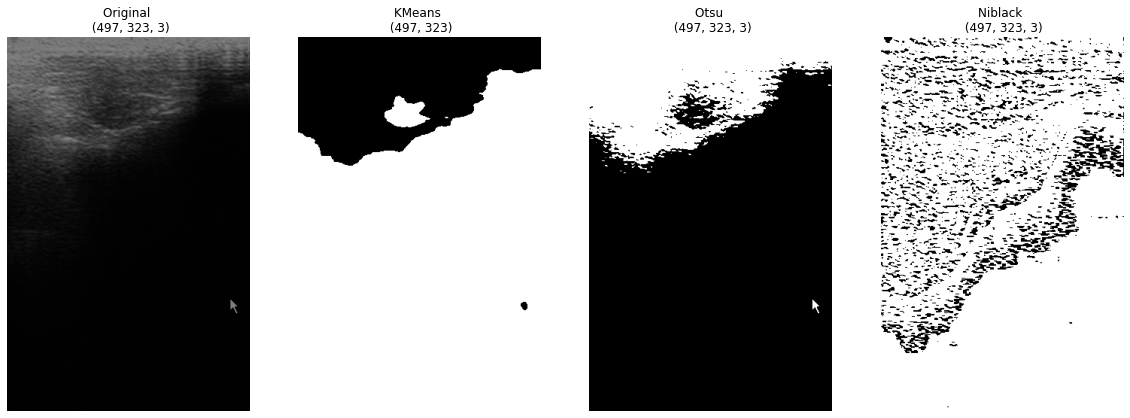

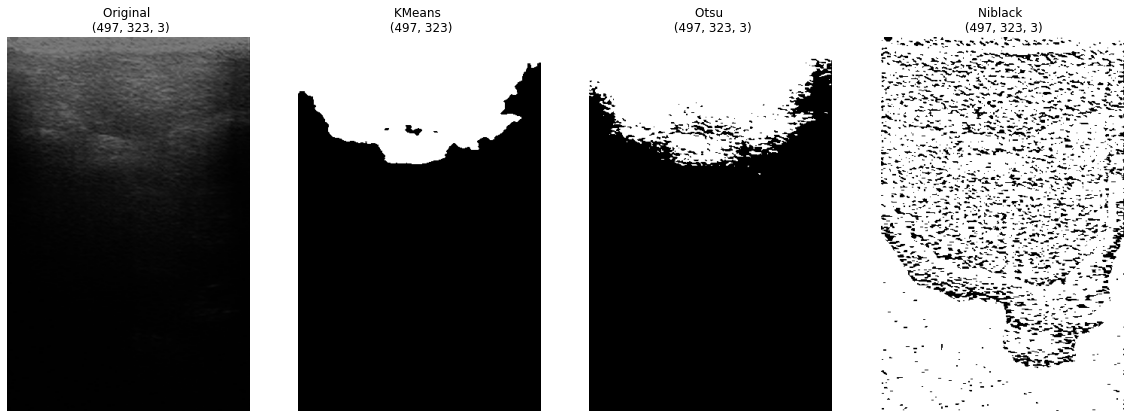

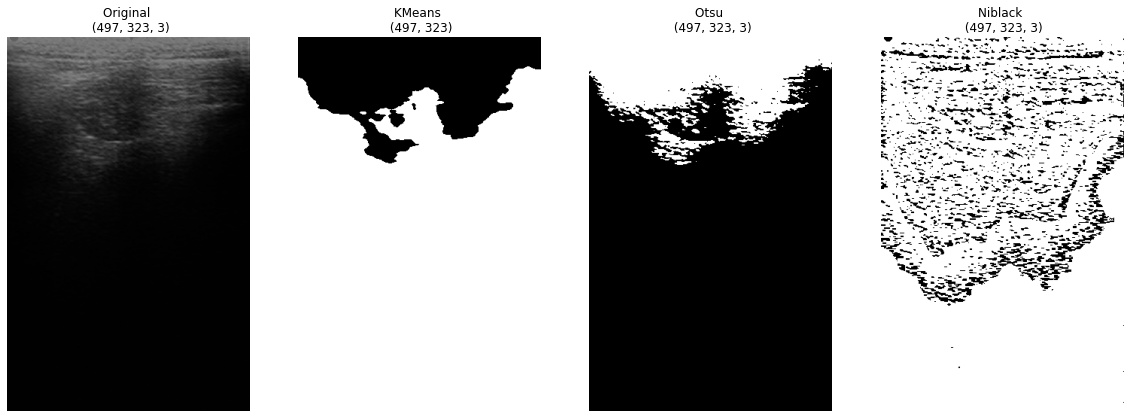

In [23]:
for i in range(5):
    comparacao(img, i)

# Questão 02

In [24]:
dataset[2]

'ultrassound/cropped/1100210009.bmp'

In [19]:
def fore_back(imagem):

    imgS = aplicaKM(KMeans(n_clusters=2), imagem)

    c1 = imgS == 0
    c2 = imgS == 1

    bk = np.zeros_like(imagem)
    bk[c1] = imagem[c1]

    fg = np.zeros_like(imagem)
    fg[c2] = imagem[c2]

    return {'background': bk, 'foreground': fg}

In [17]:
b_f_teste = fore_back(img.dimensoes[0])

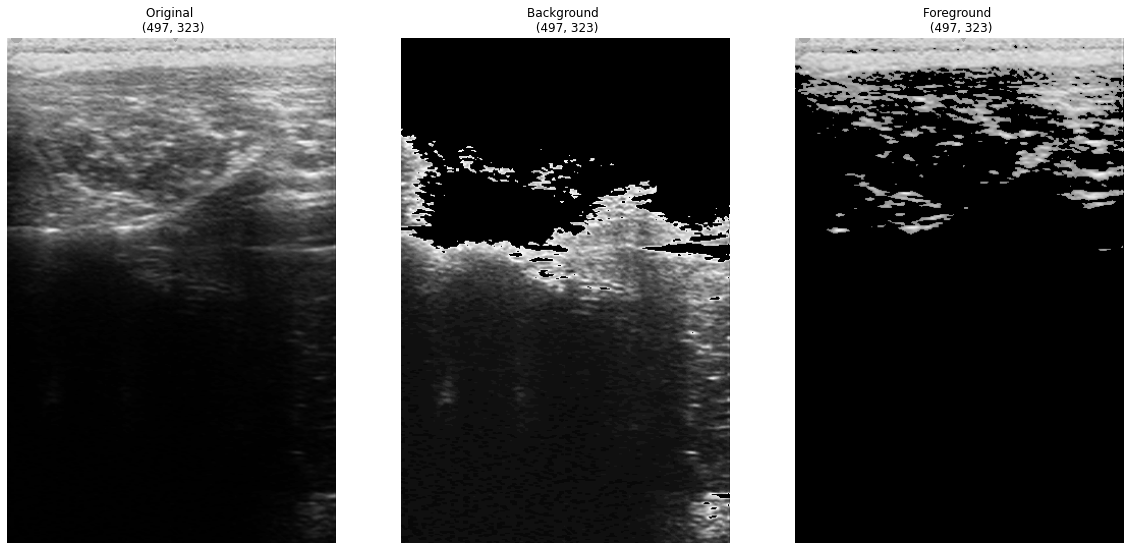

In [18]:
img.manyShowWithTitle(
    {'img': img.dimensoes[0], 'title': 'Original'},
    {'img': b_f_teste['background'], 'title': 'Background'},
    {'img': b_f_teste['foreground'], 'title': 'Foreground'}
)

# Questão 03

In [ ]:
def metricas(imagens,masks,nome):
    Accuracy = 0
    CohensKappa = 0
    ROC = 0
    for i in range(len(imagens)):
        img_ori = Imagem(imagens[i])
        img_mod = Imagem(masks[i])
        img_ori.ler()
        img_mod.ler()
        img1 = np.array(img_ori.dimensoes[0]).ravel()
        img2 = np.array(img_mod.dimensoes[0]).ravel()
        acc = accuracy_score(img1,img2)
        coh = cohen_kappa_score(img1,img2)
        roc = roc_auc_score(img1,img2,average='micro')
        Accuracy += acc
        CohensKappa += coh
        ROC += roc

    return {
        'acuracia': Accuracy/len(imagens),
        'kappa': CohensKappa/len(imagens),
        'roc': ROC/len(imagens)
    }     

In [ ]:
masks = glob('./ultrassound/masks/*', recursive=True)
kmeans_img = glob('./results/kmeans/*', recursive=True)

In [ ]:
resultados = metricas(masks,kmeans_img,'KMeans')

In [ ]:
resultados

{'acuracia': 0.5943185640035772,
 'kappa': 0.2106832109348866,
 'roc': 0.5934376345787201}